In [109]:
from PIL import Image
import numpy as np
from PIL import ImageChops, ImageOps
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

In [110]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

# konwersja RGB na L

L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [111]:
def konwertuj_L_tablice(im, w1, w2, w3):
    r, g, b = im.split()
    r_T = np.array(r)
    g_T = np.array(g)
    b_T = np.array(b)
    szary = w1 * r_T + w2 * g_T + w3 * b_T
    szary = np.clip(szary, 0, 255).astype(np.uint8)
    return Image.fromarray(szary) 
  
def konwertuj_L_kanaly(im, w1, w2, w3):
    r, g, b = im.split()
    r_n = r.point(lambda i : i*w1)
    g_n = g.point(lambda i : i*w2)
    b_n = b.point(lambda i : i*w3)  
    
    # Sumowanie kanałów
    szary_n = ImageChops.add(r_n, g_n)
    szary_n = ImageChops.add(szary_n, b_n)
    return szary_n  

im = Image.open('mgla.jpg') # obraz RGB

w1 = 0.299
w2 = 0.587
w3 = 0.114

szary = im.convert('L')
szary_t =  konwertuj_L_tablice(im, w1, w2, w3)
szary_k =  konwertuj_L_kanaly(im, w1, w2, w3)

dif1 = ImageChops.difference(szary, szary_t)
statystyki(dif1)

print('---------------------------------------------------------------')


dif2 = ImageChops.difference(szary, szary_k)
statystyki(dif2)



extrema  [(0, 1)]
count  [494214]
mean  [0.4668969312888749]
median  [0]
stddev  [0.49890298339647815]
---------------------------------------------------------------
extrema  [(0, 1)]
count  [494214]
mean  [0.2784482026004929]
median  [0]
stddev  [0.44823520730644056]


<!-- konwersja RGB na L -->

<!-- L = R * 299/1000 + G * 587/1000 + B * 114/1000 -->

RGB


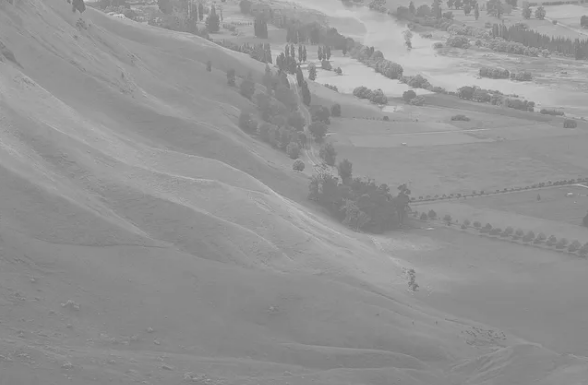

In [112]:
widok = Image.open('widok.png')
print(widok.mode)
widok

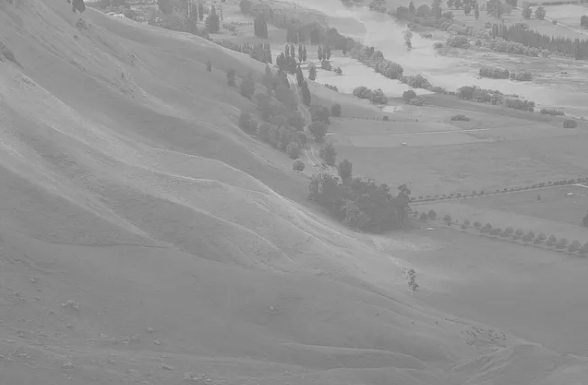

In [113]:
widok_r, g, b = widok.split()
widok_r 

L


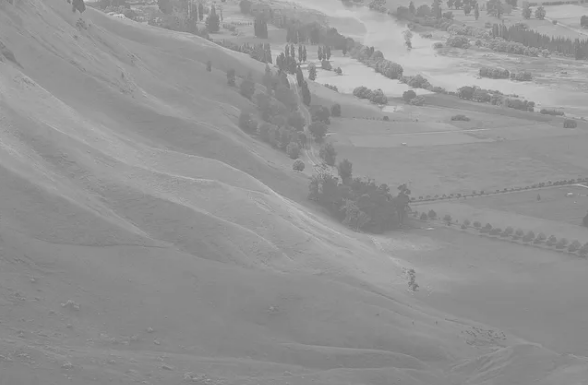

In [114]:
widok_sz = widok.convert('L')
print(widok_sz.mode)
widok_sz

In [115]:
statystyki(ImageChops.difference(widok_r, widok_sz))



extrema  [(0, 1)]
count  [226380]
mean  [0.008861206820390493]
median  [0]
stddev  [0.0937159849442813]


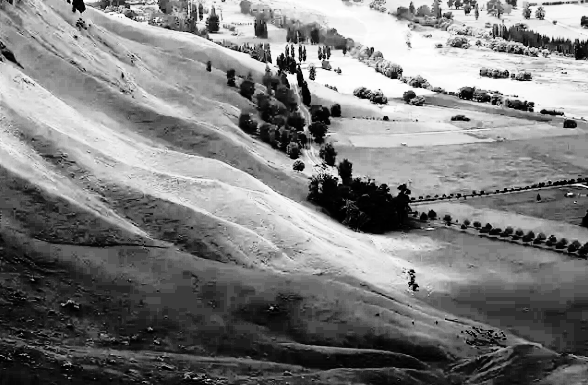

In [116]:
widok_equalized = ImageOps.equalize(widok_sz, mask = None)
widok_equalized 

In [117]:
im = Image.open('brain1.png')

print(im.mode)
print(im.size)
statystyki(im)

RGBA
(352, 324)
extrema  [(0, 254), (0, 254), (0, 254), (255, 255)]
count  [114048, 114048, 114048, 114048]
mean  [63.95809659090909, 63.95809659090909, 63.95809659090909, 255.0]
median  [68, 68, 68, 255]
stddev  [44.368672066598435, 44.368672066598435, 44.368672066598435, 0.0]


In [118]:
r, g, b, a = im.split()
szary = r
print(szary.mode)
print(szary.size)
statystyki(szary)

L
(352, 324)
extrema  [(0, 254)]
count  [114048]
mean  [63.95809659090909]
median  [68]
stddev  [44.368672066598435]


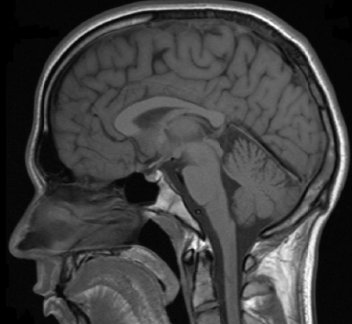

In [119]:
szary

<BarContainer object of 256 artists>

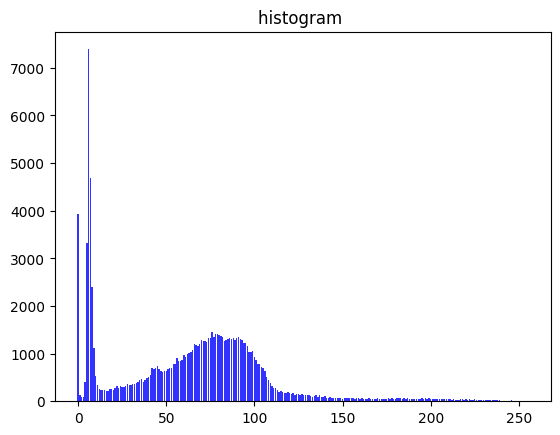

In [120]:
hist = szary.histogram()
plt.title("histogram ")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

In [121]:
im_equalized1 = ImageOps.equalize(szary, mask = None)
im_equalized1
print(im_equalized1.mode)

L


<BarContainer object of 256 artists>

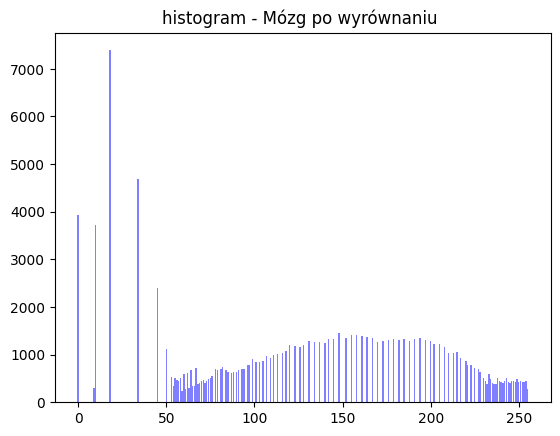

In [122]:
hist = im_equalized1.histogram()

plt.title("histogram - Mózg po wyrównaniu ")
plt.bar(range(256), hist[:], color='b', alpha=0.5)

# Wyrównanie z maską

(352, 324) L
(352, 324)


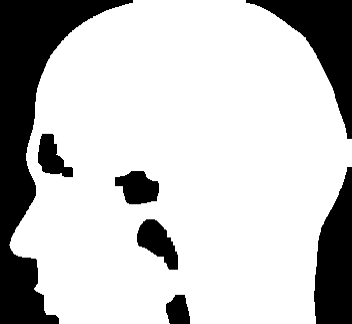

In [123]:
maska = Image.open('maska_brain1.png') 
print(maska.size, maska.mode)
print(szary.size)
maska

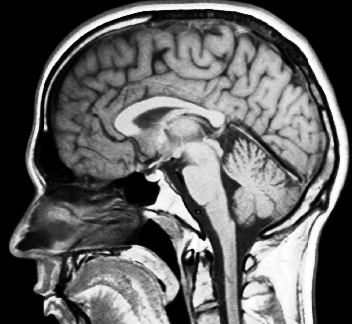

In [124]:
im_equalized2 = ImageOps.equalize(szary, mask = maska)
im_equalized2

<BarContainer object of 256 artists>

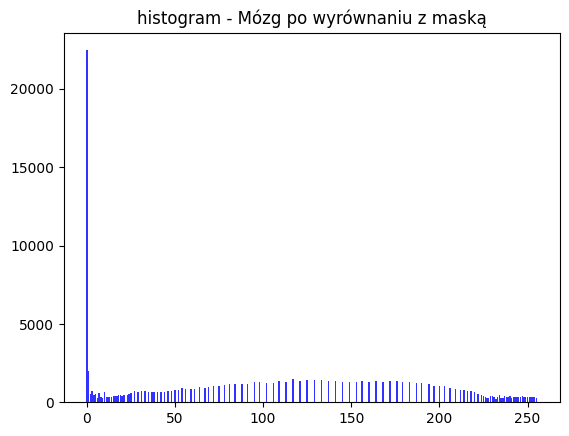

In [125]:
hist = im_equalized2.histogram()
plt.title("histogram - Mózg po wyrównaniu z maską")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

In [126]:
statystyki(szary)

extrema  [(0, 254)]
count  [114048]
mean  [63.95809659090909]
median  [68]
stddev  [44.368672066598435]


In [127]:
statystyki(im_equalized1)

extrema  [(0, 255)]
count  [114048]
mean  [125.68303696689114]
median  [126]
stddev  [74.89491908585093]


In [128]:
statystyki(im_equalized2)

extrema  [(0, 255)]
count  [114048]
mean  [97.9533003647587]
median  [88]
stddev  [83.2716813860248]


## Wyrównanie obrazów w trybie RGB

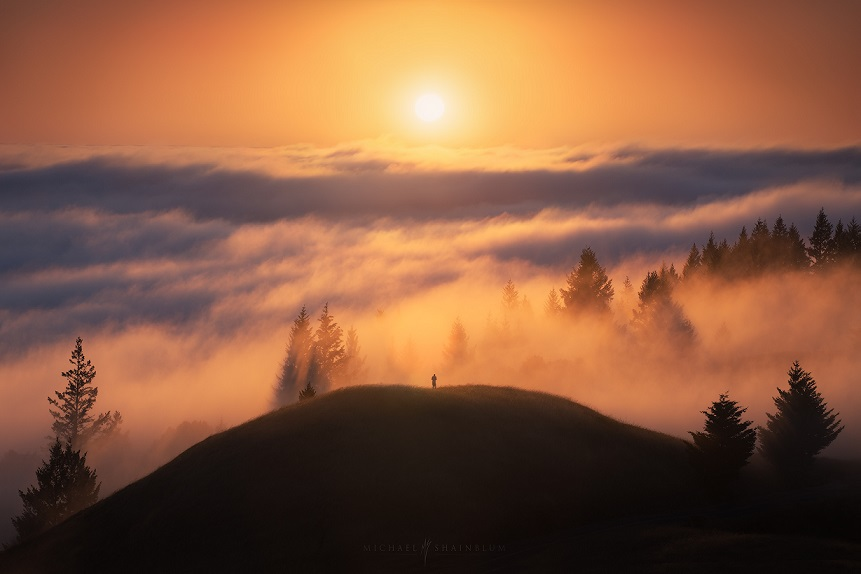

In [129]:
im = Image.open('mgla.jpg') # obraz kolorowy
im


extrema  [(5, 255), (0, 244), (0, 240)]
count  [494214, 494214, 494214]
mean  [136.95908452613645, 90.40623495085126, 63.51917388014099]
median  [149, 91, 73]
stddev  [83.18721585413134, 56.8894532947344, 35.732913863973245]


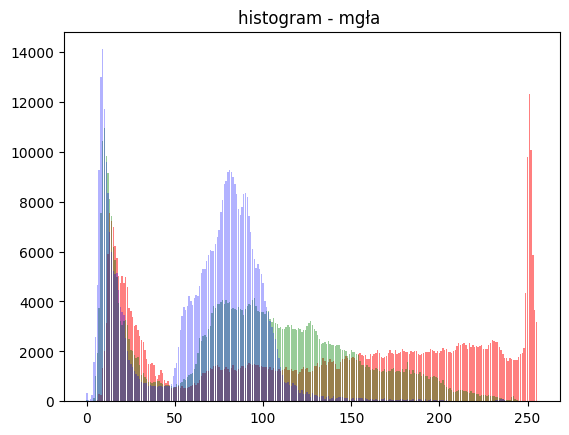

In [130]:
statystyki(im)
hist = im.histogram()
plt.title("histogram - mgła ")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

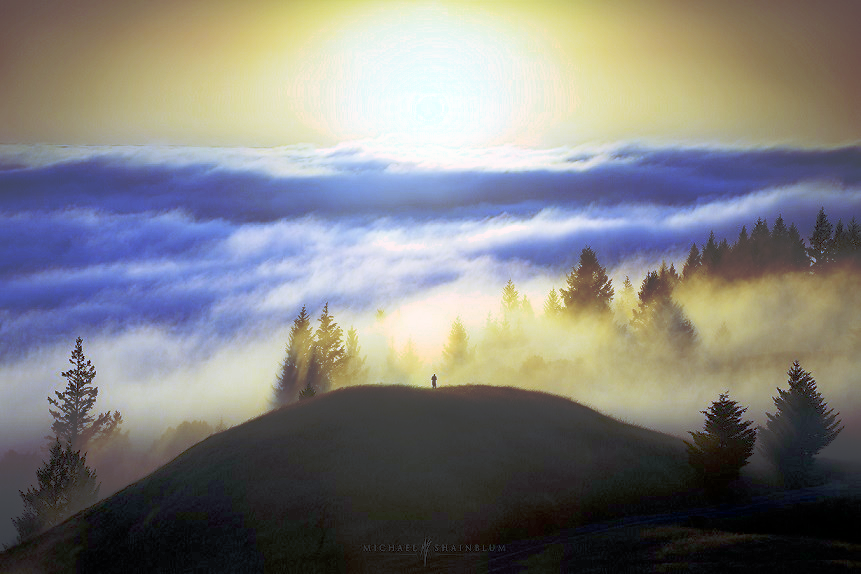

In [131]:
r, g, b = im.split()
# wyrównanie każdego kanału oddzielnie
r_eq = ImageOps.equalize(r)
g_eq = ImageOps.equalize(g)
b_eq = ImageOps.equalize(b)
im1 = Image.merge('RGB', (r_eq, g_eq, b_eq))
im1

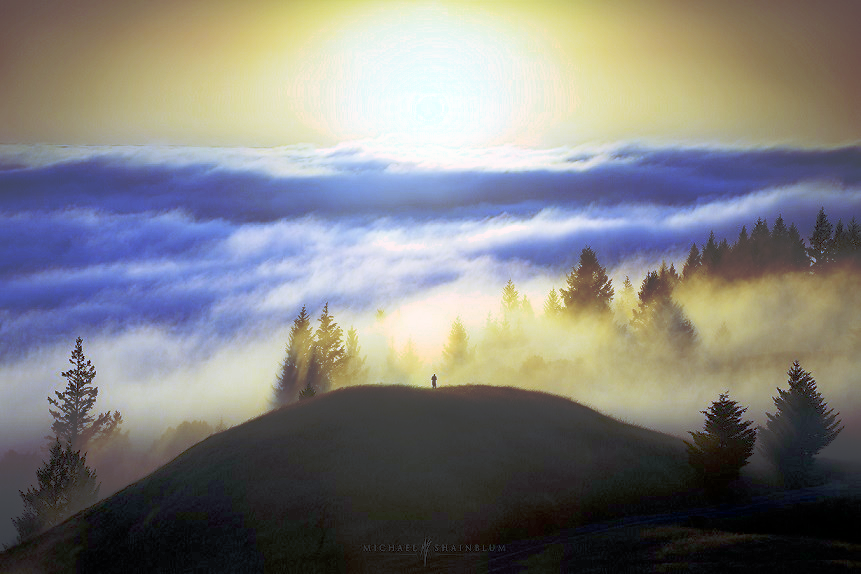

In [132]:
# wyrównaie obrazu RGB
im_equalized1 = ImageOps.equalize(im, mask=None)
im_equalized1

extrema  [(0, 255), (0, 255), (0, 255)]
count  [494214, 494214, 494214]
mean  [127.56359390871161, 126.69678115148498, 125.91618205878426]
median  [128, 126, 125]
stddev  [74.04443163783701, 74.05644815560801, 73.78911379717243]


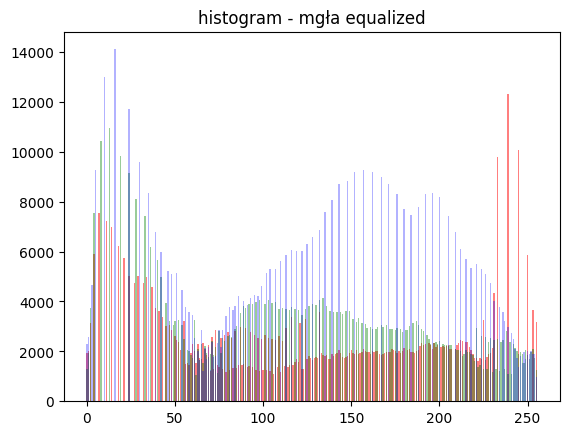

In [133]:
statystyki(im_equalized1)
hist = im_equalized1.histogram()
plt.title("histogram - mgła equalized")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

In [134]:
# dowód, że ImageOps.equalize(im) na obrazie RGB działa tak samo jak wyrównanie kazdego kanału oddzielnie i scalenie
diff=ImageChops.difference(im_equalized1, im1)
statystyki(diff)

extrema  [(0, 0), (0, 0), (0, 0)]
count  [494214, 494214, 494214]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]
